In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster
from sklearn import preprocessing
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates

In [ ]:
# Clustering hospital summary

In [6]:
heart2015 = pd.read_csv('summary_2015.csv')
heart2016 = pd.read_csv('summary_2016.csv')
heart2017 = pd.read_csv('summary_2017.csv')

In [7]:
heart = pd.concat([heart2015,heart2016,heart2017])

C:\Users\Earl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [8]:
heart.head()

,Number of Beds,System,apr_drg_code,apr_severity_of_illness,apr_severity_of_illness_description,area_sqmi,facility_name,mean_length_of_stay,mean_total_charges_day,patients,payment_typology_1
0,912,Health+,194,NaN,Extreme,0.77,Bellevue Hospital Center,13.00,5862.040,1,Blue Cross/Blue Shield
1,912,Health+,194,NaN,Major,0.77,Bellevue Hospital Center,1.00,9352.740,1,Blue Cross/Blue Shield
2,912,Health+,194,NaN,Minor,0.77,Bellevue Hospital Center,12.00,5320.110,1,Blue Cross/Blue Shield
3,912,Health+,194,NaN,Moderate,0.77,Bellevue Hospital Center,3.75,6556.745,4,Blue Cross/Blue Shield
4,912,Health+,194,NaN,Extreme,0.77,Bellevue Hospital Center,16.50,6252.629,10,Medicare


In [77]:
# severity = pd.get_dummies(sept['apr_severity_of_illness_description'])
# system = pd.get_dummies(sept['System'])
# payment = pd.get_dummies(sept['payment_typology_1'])

In [10]:
heart['apr_severity_of_illness_description'].fillna(heart['apr_severity_of_illness'], inplace=True)

In [11]:
severity = heart['apr_severity_of_illness_description'].astype('category').cat.codes

In [12]:
system = heart['System'].astype('category').cat.codes

In [13]:
payment = heart['payment_typology_1'].astype('category').cat.codes

In [14]:
facility = heart['facility_name'].astype('category').cat.codes

In [16]:
df = pd.concat([heart, severity, system, payment, facility], axis=1)

In [17]:
df = df.rename(columns={0:'severity', 1:'system', 2:'payment', 3:'hospital'})

In [18]:
df.head()

,Number of Beds,System,apr_drg_code,apr_severity_of_illness,apr_severity_of_illness_description,area_sqmi,facility_name,mean_length_of_stay,mean_total_charges_day,patients,payment_typology_1,severity,system,payment,hospital
0,912,Health+,194,NaN,Extreme,0.77,Bellevue Hospital Center,13.00,5862.040,1,Blue Cross/Blue Shield,0,0,0,0
1,912,Health+,194,NaN,Major,0.77,Bellevue Hospital Center,1.00,9352.740,1,Blue Cross/Blue Shield,1,0,0,0
2,912,Health+,194,NaN,Minor,0.77,Bellevue Hospital Center,12.00,5320.110,1,Blue Cross/Blue Shield,2,0,0,0
3,912,Health+,194,NaN,Moderate,0.77,Bellevue Hospital Center,3.75,6556.745,4,Blue Cross/Blue Shield,3,0,0,0
4,912,Health+,194,NaN,Extreme,0.77,Bellevue Hospital Center,16.50,6252.629,10,Medicare,0,0,1,0


In [19]:
df.columns

Index(['Number of Beds', 'System', 'apr_drg_code', 'apr_severity_of_illness',
       'apr_severity_of_illness_description', 'area_sqmi', 'facility_name',
       'mean_length_of_stay', 'mean_total_charges_day', 'patients',
       'payment_typology_1', 'severity', 'system', 'payment', 'hospital'],
      dtype='object')

In [20]:
list(enumerate(df['facility_name'].astype('category').cat.categories))

[(0, 'Bellevue Hospital Center'),
 (1, 'Bronx-Lebanon Hospital Center - Concourse Division'),
 (2, 'Brookdale Hospital Medical Center'),
 (3, 'Brooklyn Hospital Center - Downtown Campus'),
 (4, 'Calvary Hospital Inc'),
 (5, 'Coney Island Hospital'),
 (6, 'Elmhurst Hospital Center'),
 (7, 'Flushing Hospital Medical Center'),
 (8, 'Harlem Hospital Center'),
 (9, 'Henry J. Carter Specialty Hospital'),
 (10, 'Hospital for Special Surgery'),
 (11, 'Interfaith Medical Center'),
 (12, 'Jacobi Medical Center'),
 (13, 'Jamaica Hospital Medical Center'),
 (14, 'Kings County Hospital Center'),
 (15, 'Kingsbrook Jewish Medical Center'),
 (16, 'Lenox Hill Hospital'),
 (17, 'Lincoln Medical & Mental Health Center'),
 (18, 'Long Island Jewish Forest Hills'),
 (19, 'Long Island Jewish Medical Center'),
 (20, 'Maimonides Medical Center'),
 (21, 'Memorial Hospital for Cancer and Allied Diseases'),
 (22, 'Metropolitan Hospital Center'),
 (23, 'Montefiore Med Center - Jack D Weiler Hosp of A Einstein Coll

In [21]:
var_list =['Number of Beds',
          'area_sqmi',
          'mean_length_of_stay',
          'mean_total_charges_day',
          'patients',
          'severity',
          'system',
          'payment',
          'hospital']

In [22]:
X = df[var_list]

In [23]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.88505451, -0.9103731 ,  1.69997853, ..., -1.14043411,
        -1.34940634, -1.63115961],
       [ 1.88505451, -0.9103731 , -1.13082825, ..., -1.14043411,
        -1.34940634, -1.63115961],
       [ 1.88505451, -0.9103731 ,  1.46407797, ..., -1.14043411,
        -1.34940634, -1.63115961],
       ...,
       [-0.62301583,  0.44640685, -0.89492768, ...,  1.30301612,
         0.62109488,  1.72110004],
       [-0.62301583,  0.44640685, -0.82752752, ...,  1.30301612,
         0.62109488,  1.72110004],
       [-0.62301583,  0.44640685, -0.30517627, ...,  1.30301612,
         1.60634548,  1.72110004]])

In [24]:
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=3, n_init=10)

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)

In [25]:
# Add cluster number to the original data
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
#X_scaled['hospital_name'] = sept['facility_name']

X_scaled.head()

,Number of Beds,area_sqmi,mean_length_of_stay,mean_total_charges_day,patients,severity,system,payment,hospital
0,1.885055,-0.910373,1.699979,-0.819303,-0.464811,-1.482302,-1.140434,-1.349406,-1.63116
1,1.885055,-0.910373,-1.130828,0.137534,-0.464811,-0.571695,-1.140434,-1.349406,-1.63116
2,1.885055,-0.910373,1.464078,-0.967852,-0.464811,0.338912,-1.140434,-1.349406,-1.63116
3,1.885055,-0.910373,-0.482102,-0.628877,-0.415181,1.249519,-1.140434,-1.349406,-1.63116
4,1.885055,-0.910373,2.525631,-0.712238,-0.315921,-1.482302,-1.140434,-0.364156,-1.63116


In [26]:
X_kmeans = X_scaled[var_list]

In [27]:
range_n_clusters = range(2,10)
sil = []

for n_clusters in range_n_clusters:
    km = KMeans(random_state = 100, n_clusters = n_clusters)
    res = km.fit_predict(X_kmeans)
    silhouette_avg = silhouette_score(X_kmeans, res)
    sil.append(silhouette_avg)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.13575929523391306
For n_clusters = 3, the average silhouette_score is : 0.1301584109384596
For n_clusters = 4, the average silhouette_score is : 0.13198049769049178
For n_clusters = 5, the average silhouette_score is : 0.1439753449512624
For n_clusters = 6, the average silhouette_score is : 0.1641461842796609
For n_clusters = 7, the average silhouette_score is : 0.16872482692752092
For n_clusters = 8, the average silhouette_score is : 0.17171205807732476
For n_clusters = 9, the average silhouette_score is : 0.16608004958438222


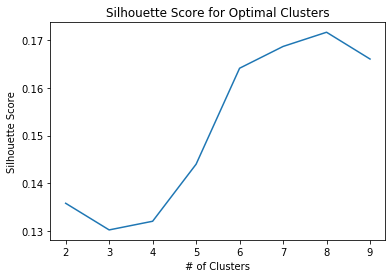

In [28]:
plt.plot(range_n_clusters, sil)
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

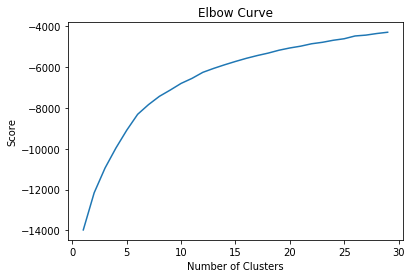

In [29]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 30
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X_kmeans).score(X_kmeans) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [36]:
km = KMeans(random_state=234, n_clusters = 8)
res = km.fit(X_kmeans)

In [37]:
from collections import Counter, defaultdict
print(Counter(res.labels_))

Counter({1: 326, 7: 281, 4: 249, 2: 201, 3: 200, 0: 135, 5: 102, 6: 59})


In [38]:
X_scaled["cluster"] = res.labels_

In [39]:
df["cluster"] = res.labels_

In [43]:
import seaborn as sns
palette = sns.color_palette("bright", 10)

def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''
    
    return (colour[0],colour[1],colour[2],alpha)

def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    # Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster==i])
    
    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates Plot for the Clusters", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
#     for i in range(num_clusters):    
#         plt.subplot(num_clusters, 1, i+1)
#         for j,c in enumerate(cluster_points): 
#             if i!= j:
#                 pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.5)])
    pc = parallel_coordinates(cluster_points[0], 'cluster', color=[addAlpha(palette[0],0.5)])
    pc = parallel_coordinates(cluster_points[1], 'cluster', color=[addAlpha(palette[1],0.5)])
    pc = parallel_coordinates(cluster_points[2], 'cluster', color=[addAlpha(palette[2],0.5)])
    pc = parallel_coordinates(cluster_points[3], 'cluster', color=[addAlpha(palette[3],0.5)])
    pc = parallel_coordinates(cluster_points[4], 'cluster', color=[addAlpha(palette[4],0.5)])
    pc = parallel_coordinates(cluster_points[5], 'cluster', color=[addAlpha(palette[5],0.5)])
    pc = parallel_coordinates(cluster_points[6], 'cluster', color=[addAlpha(palette[6],0.5)])
    pc = parallel_coordinates(cluster_points[7], 'cluster', color=[addAlpha(palette[7],0.5)])

# Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)

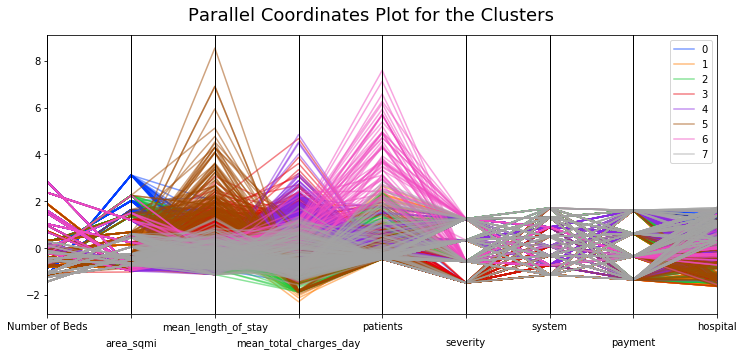

In [44]:
cluster_attributes = ['Number of Beds',
          'area_sqmi',
          'mean_length_of_stay',
          'mean_total_charges_day',
          'patients',
          'severity',
          'system',
          'payment',
          'hospital',
          'cluster']
# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_scaled[cluster_attributes], 8)

In [45]:
def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20) 

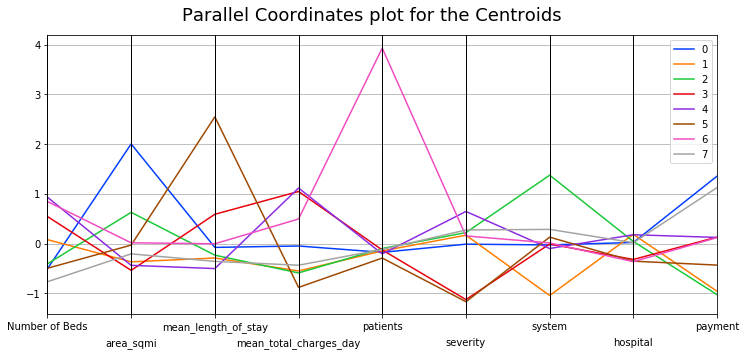

In [46]:
attributes_1 = ['Number of Beds',
          'area_sqmi',
          'mean_length_of_stay',
          'mean_total_charges_day',
          'patients',
          'severity',
          'system',
          'hospital',
          'payment']
centroids = pd.DataFrame(km.cluster_centers_, columns = X_scaled[attributes_1].columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 8)

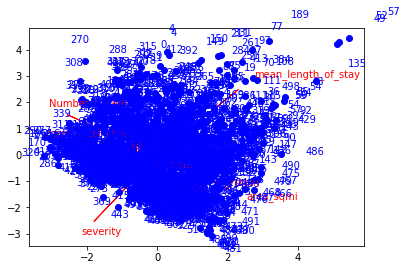

In [47]:
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components = 2)
# defaults number of PCs to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value

dat = X_scaled[attributes_1]
pca.fit(dat)



## project data into PC space

# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(dat)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(dat)[:,1]

## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(dat.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2, list(dat.index)[i], color='b')

plt.show()

In [48]:
# Scaled Gaussian mixture models

from sklearn.mixture import GaussianMixture

range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components = n_clusters, random_state = 100)
    res = gmm.fit_predict(X_scaled[var_list])
    silhouette_avg = silhouette_score(X_scaled[var_list], res)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.0558500047065838
For n_clusters = 3, the average silhouette_score is : 0.055287263751408036
For n_clusters = 4, the average silhouette_score is : 0.044762195199507825
For n_clusters = 5, the average silhouette_score is : 0.07043559723190648
For n_clusters = 6, the average silhouette_score is : 0.024284450144362646
For n_clusters = 7, the average silhouette_score is : 0.03998966758079396
For n_clusters = 8, the average silhouette_score is : 0.05731062698111126
For n_clusters = 9, the average silhouette_score is : 0.04375012572083702


In [49]:
# Unscaled Gaussian mixture models

from sklearn.mixture import GaussianMixture

range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components = n_clusters, random_state = 100)
    res = gmm.fit_predict(X[var_list])
    silhouette_avg = silhouette_score(X[var_list], res)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : -0.026286252190227427
For n_clusters = 3, the average silhouette_score is : -0.04949478721758533
For n_clusters = 4, the average silhouette_score is : -0.12763890407045783
For n_clusters = 5, the average silhouette_score is : -0.18063491857724043
For n_clusters = 6, the average silhouette_score is : -0.31816986855061813
For n_clusters = 7, the average silhouette_score is : -0.15809124299702323
For n_clusters = 8, the average silhouette_score is : -0.2516462651972893
For n_clusters = 9, the average silhouette_score is : -0.17578602325355303


In [50]:
X[var_list].corr()

,Number of Beds,area_sqmi,mean_length_of_stay,mean_total_charges_day,patients,severity,system,payment,hospital
Number of Beds,1.000000,-0.178806,-0.010990,0.342551,0.132515,-0.026679,-0.134049,0.011389,-0.183384
area_sqmi,-0.178806,1.000000,-0.009763,-0.200966,0.016894,0.006828,0.225432,0.019218,0.112433
mean_length_of_stay,-0.010990,-0.009763,1.000000,-0.166569,0.026310,-0.545751,0.019789,-0.069834,-0.091388
mean_total_charges_day,0.342551,-0.200966,-0.166569,1.000000,0.044907,-0.032213,-0.036067,-0.040837,0.171513
patients,0.132515,0.016894,0.026310,0.044907,1.000000,0.057569,0.022402,-0.143225,0.013222
severity,-0.026679,0.006828,-0.545751,-0.032213,0.057569,1.000000,0.000149,0.037917,0.009821
system,-0.134049,0.225432,0.019789,-0.036067,0.022402,0.000149,1.000000,-0.062116,0.080478
payment,0.011389,0.019218,-0.069834,-0.040837,-0.143225,0.037917,-0.062116,1.000000,-0.039406
hospital,-0.183384,0.112433,-0.091388,0.171513,0.013222,0.009821,0.080478,-0.039406,1.000000


In [51]:
X_scaled[var_list].corr()

,Number of Beds,area_sqmi,mean_length_of_stay,mean_total_charges_day,patients,severity,system,payment,hospital
Number of Beds,1.000000,-0.178806,-0.010990,0.342551,0.132515,-0.026679,-0.134049,0.011389,-0.183384
area_sqmi,-0.178806,1.000000,-0.009763,-0.200966,0.016894,0.006828,0.225432,0.019218,0.112433
mean_length_of_stay,-0.010990,-0.009763,1.000000,-0.166569,0.026310,-0.545751,0.019789,-0.069834,-0.091388
mean_total_charges_day,0.342551,-0.200966,-0.166569,1.000000,0.044907,-0.032213,-0.036067,-0.040837,0.171513
patients,0.132515,0.016894,0.026310,0.044907,1.000000,0.057569,0.022402,-0.143225,0.013222
severity,-0.026679,0.006828,-0.545751,-0.032213,0.057569,1.000000,0.000149,0.037917,0.009821
system,-0.134049,0.225432,0.019789,-0.036067,0.022402,0.000149,1.000000,-0.062116,0.080478
payment,0.011389,0.019218,-0.069834,-0.040837,-0.143225,0.037917,-0.062116,1.000000,-0.039406
hospital,-0.183384,0.112433,-0.091388,0.171513,0.013222,0.009821,0.080478,-0.039406,1.000000


In [52]:
# With PCA

In [53]:
X_scaled_pca = X_scaled[var_list]

In [54]:
# Import the PCA function from sklearn
from sklearn.decomposition import PCA

# Select the number of principal components we will return
num_components = 9

# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(X_scaled_pca)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [55]:
pca.explained_variance_ratio_

array([0.18067536, 0.17394925, 0.13903149, 0.12209589, 0.10574664,
       0.09557177, 0.08138173, 0.05720924, 0.04433864])

In [56]:
pca.explained_variance_ratio_.cumsum()

array([0.18067536, 0.35462461, 0.4936561 , 0.61575199, 0.72149862,
       0.81707039, 0.89845212, 0.95566136, 1.        ])

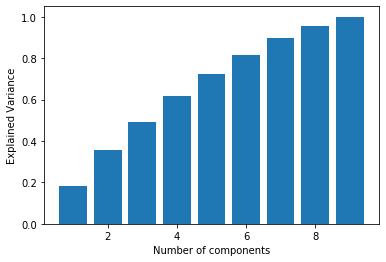

In [57]:
#plot explained variance over the number of compinents
n = 9
plt.bar(np.arange(n)+1, pca.explained_variance_ratio_.cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

## Decision Tree

In [58]:
labels = ['low', 'medium', 'high']

X['price_category'] = pd.qcut((X['mean_total_charges_day']),3, labels=labels)

C:\Users\Earl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

var_list_1 =['Number of Beds',
             'area_sqmi',
             'mean_length_of_stay',
             'patients',
             'severity',
             'system',
             'payment',
             'hospital']

x = X[var_list_1]
y = X['price_category']

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=999)

In [60]:
max_depth_list = list(range(1,21))
accuracy_test = []

for i in max_depth_list:
    dt = DecisionTreeClassifier(max_depth = i)
    dt.fit(X_train, y_train)
    accuracy_test.append(dt.score(X_test, y_test))
    print("for max_depth = {}:".format(i), accuracy_test[i-1])

for max_depth = 1: 0.49356223175965663
for max_depth = 2: 0.6051502145922747
for max_depth = 3: 0.7124463519313304
for max_depth = 4: 0.6909871244635193
for max_depth = 5: 0.7381974248927039
for max_depth = 6: 0.7467811158798283
for max_depth = 7: 0.7532188841201717
for max_depth = 8: 0.7682403433476395
for max_depth = 9: 0.7381974248927039
for max_depth = 10: 0.721030042918455
for max_depth = 11: 0.7167381974248928
for max_depth = 12: 0.7103004291845494
for max_depth = 13: 0.7124463519313304
for max_depth = 14: 0.7060085836909872
for max_depth = 15: 0.7103004291845494
for max_depth = 16: 0.6974248927038627
for max_depth = 17: 0.7167381974248928
for max_depth = 18: 0.7081545064377682
for max_depth = 19: 0.6974248927038627
for max_depth = 20: 0.7188841201716738


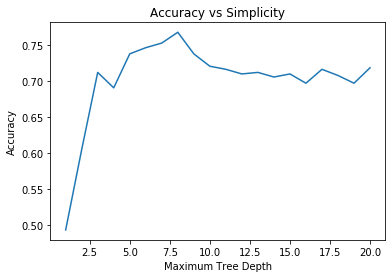

In [61]:
import matplotlib.pylab as plt

# your code here
plt.plot(max_depth_list, accuracy_test)
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Simplicity')
plt.show()

In [62]:
from sklearn.model_selection import GridSearchCV

# your code here
dt = DecisionTreeClassifier(random_state = 999)
param_grid = {'max_depth':range(1,20)}
gr = GridSearchCV(dt, param_grid = param_grid, scoring='accuracy')
rs = gr.fit(X_train,y_train)

print(rs.best_params_)
print(rs.score(X_test,y_test))

C:\Users\Earl\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 7}
0.7489270386266095


In [63]:
from sklearn import tree

# your code here
dt = DecisionTreeClassifier(max_depth = 2, random_state = 999)
dt.fit(X_train, y_train)
thestring = tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names = dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print(thestring)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="hospital <= 13.5, samples = 1087, value = [351, 368, 368], class = low", fillcolor="#ffffff"] ;
1 [label="system <= 1.0, samples = 320, value = [17, 205, 98], class = low", fillcolor="#a0f2c2"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 139, value = [1, 59, 79], class = medium", fillcolor="#e0cef8"] ;
1 -> 2 ;
3 [label="samples = 181, value = [16, 146, 19], class = low", fillcolor="#64eb9c"] ;
1 -> 3 ;
4 [label="hospital <= 38.5, samples = 767, value = [334, 163, 270], class = high", fillcolor="#fcefe6"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 547, value = [310, 66, 171], class = high", fillcolor="#f5d0b6"] ;
4 -> 5 ;
6 [label="samples = 220, value = [24, 97, 99], class = medium", fillcolor="#fdfcff"] ;
4 -> 6 ;
}


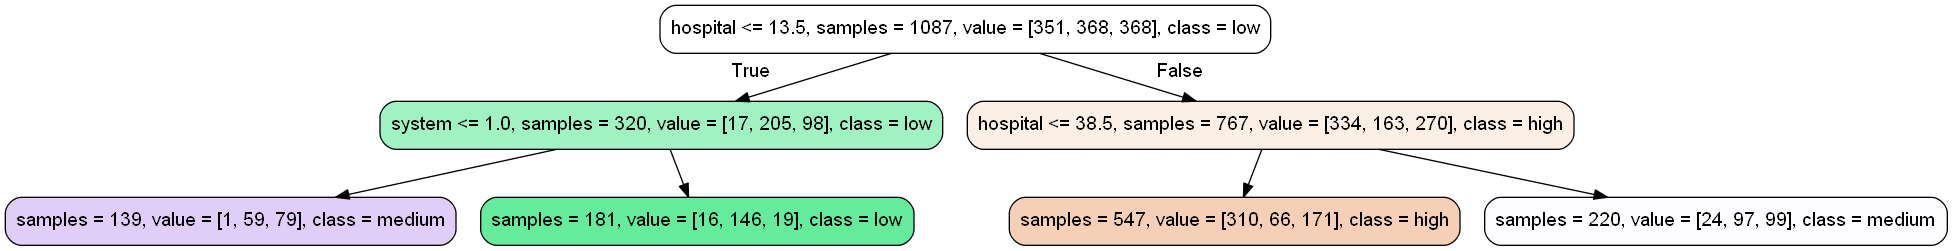

In [64]:
from IPython.display import Image  
import pydotplus
import os     
from sklearn import tree

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dt = DecisionTreeClassifier(max_depth=10, random_state = 999) # just to keep it simple for visualization
dt.fit(X_train,y_train)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())

## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# your code here
rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_leaf_nodes=10, random_state = 50)
rf_pred = rf.fit(X_train, y_train)
pred = rf_pred.score(X_test,y_test)
print(pred)

0.7510729613733905


In [66]:
# hyperparameter tuning

rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_leaf_nodes=10, random_state = 50)

# alternatively, rf can be written as
# rf = RandomForestClassifier(n_estimators=100)

param_grid = {'max_leaf_nodes':range(2,20)}
gr_rf = GridSearchCV(rf, param_grid = param_grid, scoring='accuracy')
rs_rf = gr_rf.fit(X_train,y_train)

print(rs_rf.best_params_)
print(rs_rf.score(X_test,y_test))

C:\Users\Earl\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 18}
0.7660944206008584


In [67]:
rf_pred.feature_importances_

array([0.21454014, 0.25557256, 0.0504924 , 0.0113852 , 0.00560315,
       0.20579801, 0.00283667, 0.25377188])

In [68]:
var_list_1 =['Number of Beds',
             'area_sqmi',
             'mean_length_of_stay',
             'patients',
             'severity',
             'system',
             'payment',
             'hospital']

## Multivariate Regression

In [71]:
severity = pd.get_dummies(heart['apr_severity_of_illness_description'])
system = pd.get_dummies(heart['System'])
payment = pd.get_dummies(heart['payment_typology_1'])
hospital_facility = pd.get_dummies(heart['facility_name'])

In [72]:
df_reg = pd.concat([heart, severity, system, payment, hospital_facility], axis=1)

In [73]:
df_reg.shape

(1553, 76)

In [74]:
column_list = list(df_reg.columns)

In [75]:
reg_var = ['Number of Beds',
 'area_sqmi',
 'mean_length_of_stay',
 'patients',
 'Mount Sinai',
 'NYU Langone',
 'NewYork-Presbyterian',
 'Northwell',
 'Others',
 'SUNY',
 'Blue Cross/Blue Shield',
 'Medicare',
 'Private Health Insurance',
 'Self-Pay',
 'Bellevue Hospital Center',
 'Bronx-Lebanon Hospital Center - Concourse Division',
 'Brookdale Hospital Medical Center',
 'Brooklyn Hospital Center - Downtown Campus',
 'Calvary Hospital Inc',
 'Coney Island Hospital',
 'Elmhurst Hospital Center',
 'Flushing Hospital Medical Center',
 'Harlem Hospital Center',
 'Henry J. Carter Specialty Hospital',
 'Interfaith Medical Center',
 'Jacobi Medical Center',
 'Jamaica Hospital Medical Center',
 'Kings County Hospital Center',
 'Kingsbrook Jewish Medical Center',
 'Lenox Hill Hospital',
 'Lincoln Medical & Mental Health Center',
 'Long Island Jewish Forest Hills',
 'Long Island Jewish Medical Center',
 'Maimonides Medical Center',
 'Memorial Hospital for Cancer and Allied Diseases',
 'Metropolitan Hospital Center',
 'Montefiore Med Center - Jack D Weiler Hosp of A Einstein College Div',
 'Montefiore Medical Center - Henry & Lucy Moses Div',
 'Montefiore Medical Center-Wakefield Hospital',
 'Mount Sinai Beth Israel',
 'Mount Sinai Brooklyn',
 'Mount Sinai Hospital',
 'Mount Sinai Hospital - Mount Sinai Hospital of Queens',
 "Mount Sinai St. Luke's",
 'Mount Sinai West',
 'NYU Hospitals Center',
 'NYU Langone Hospital-Brooklyn',
 'NYU Langone Hospitals',
 'NYU Langone Orthopedic Hospital',
 'NYU Lutheran Medical Center',
 'New York Community Hospital of Brooklyn, Inc',
 'New York-Presbyterian/Lower Manhattan Hospital',
 'New York-Presbyterian/Queens',
 'North Central Bronx Hospital',
 'Queens Hospital Center',
 'Richmond University Medical Center',
 'SBH Health System',
 'Staten Island University Hosp-North',
 'Staten Island University Hosp-South',
 'University Hospital of Brooklyn',
 'Woodhull Medical & Mental Health Center',
 'Wyckoff Heights Medical Center']

In [76]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele +'+'  
    
    # return string   
    return str1  

In [77]:
df_reg.columns = df_reg.columns.str.replace(' ', '_')

In [78]:
df_reg.columns = df_reg.columns.str.replace("'", '_')

In [79]:
df_reg.columns = df_reg.columns.str.replace("-", '_')

In [80]:
df_reg.columns = df_reg.columns.str.replace(".", '_')

In [81]:
df_reg.columns = df_reg.columns.str.replace("/", '_')

In [82]:
df_reg.columns = df_reg.columns.str.replace(",", '_')

In [83]:
df_reg.columns = df_reg.columns.str.replace("&", '_')

In [84]:
df_reg.columns

Index(['Number_of_Beds', 'System', 'apr_drg_code', 'apr_severity_of_illness',
       'apr_severity_of_illness_description', 'area_sqmi', 'facility_name',
       'mean_length_of_stay', 'mean_total_charges_day', 'patients',
       'payment_typology_1', 'Extreme', 'Major', 'Minor', 'Moderate',
       'Health+', 'Montefiore', 'Mount_Sinai', 'NYU_Langone',
       'NewYork_Presbyterian', 'Northwell', 'Others', 'SUNY',
       'Blue_Cross_Blue_Shield', 'Medicare', 'Private_Health_Insurance',
       'Self_Pay', 'Bellevue_Hospital_Center',
       'Bronx_Lebanon_Hospital_Center___Concourse_Division',
       'Brookdale_Hospital_Medical_Center',
       'Brooklyn_Hospital_Center___Downtown_Campus', 'Calvary_Hospital_Inc',
       'Coney_Island_Hospital', 'Elmhurst_Hospital_Center',
       'Flushing_Hospital_Medical_Center', 'Harlem_Hospital_Center',
       'Henry_J__Carter_Specialty_Hospital', 'Hospital_for_Special_Surgery',
       'Interfaith_Medical_Center', 'Jacobi_Medical_Center',
       'Jamaica

In [85]:
reg_str = (listToString(reg_var)) 

In [86]:
reg_str = reg_str[:-1]

In [87]:
reg_str = reg_str.replace(" ", "_")

In [88]:
reg_str = reg_str.replace("'", "_")

In [89]:
reg_str = reg_str.replace("-", "_")

In [90]:
reg_str = reg_str.replace(".", "_")

In [91]:
reg_str = reg_str.replace("/", "_")

In [92]:
reg_str = reg_str.replace(",", "_")

In [93]:
reg_str = reg_str.replace("&", "_")

In [94]:
reg_str

'Number_of_Beds+area_sqmi+mean_length_of_stay+patients+Mount_Sinai+NYU_Langone+NewYork_Presbyterian+Northwell+Others+SUNY+Blue_Cross_Blue_Shield+Medicare+Private_Health_Insurance+Self_Pay+Bellevue_Hospital_Center+Bronx_Lebanon_Hospital_Center___Concourse_Division+Brookdale_Hospital_Medical_Center+Brooklyn_Hospital_Center___Downtown_Campus+Calvary_Hospital_Inc+Coney_Island_Hospital+Elmhurst_Hospital_Center+Flushing_Hospital_Medical_Center+Harlem_Hospital_Center+Henry_J__Carter_Specialty_Hospital+Interfaith_Medical_Center+Jacobi_Medical_Center+Jamaica_Hospital_Medical_Center+Kings_County_Hospital_Center+Kingsbrook_Jewish_Medical_Center+Lenox_Hill_Hospital+Lincoln_Medical___Mental_Health_Center+Long_Island_Jewish_Forest_Hills+Long_Island_Jewish_Medical_Center+Maimonides_Medical_Center+Memorial_Hospital_for_Cancer_and_Allied_Diseases+Metropolitan_Hospital_Center+Montefiore_Med_Center___Jack_D_Weiler_Hosp_of_A_Einstein_College_Div+Montefiore_Medical_Center___Henry___Lucy_Moses_Div+Montefior

In [95]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [96]:
lm = smf.ols(formula='mean_total_charges_day ~ Number_of_Beds+area_sqmi+mean_length_of_stay+patients+Mount_Sinai+NYU_Langone+NewYork_Presbyterian+Northwell+Others+SUNY+Blue_Cross_Blue_Shield+Medicare+Private_Health_Insurance+Self_Pay+Bellevue_Hospital_Center+Bronx_Lebanon_Hospital_Center___Concourse_Division+Brookdale_Hospital_Medical_Center+Brooklyn_Hospital_Center___Downtown_Campus+Calvary_Hospital_Inc+Coney_Island_Hospital+Elmhurst_Hospital_Center+Flushing_Hospital_Medical_Center+Harlem_Hospital_Center+Henry_J__Carter_Specialty_Hospital+Interfaith_Medical_Center+Jacobi_Medical_Center+Jamaica_Hospital_Medical_Center+Kings_County_Hospital_Center+Kingsbrook_Jewish_Medical_Center+Lenox_Hill_Hospital+Lincoln_Medical___Mental_Health_Center+Long_Island_Jewish_Forest_Hills+Long_Island_Jewish_Medical_Center+Maimonides_Medical_Center+Memorial_Hospital_for_Cancer_and_Allied_Diseases+Metropolitan_Hospital_Center+Montefiore_Med_Center___Jack_D_Weiler_Hosp_of_A_Einstein_College_Div+Montefiore_Medical_Center___Henry___Lucy_Moses_Div+Montefiore_Medical_Center_Wakefield_Hospital+Mount_Sinai_Beth_Israel+Mount_Sinai_Brooklyn+Mount_Sinai_Hospital+Mount_Sinai_Hospital___Mount_Sinai_Hospital_of_Queens+Mount_Sinai_St__Luke_s+Mount_Sinai_West+NYU_Hospitals_Center+NYU_Langone_Hospital_Brooklyn+NYU_Langone_Hospitals+NYU_Langone_Orthopedic_Hospital+NYU_Lutheran_Medical_Center+New_York_Community_Hospital_of_Brooklyn__Inc+New_York_Presbyterian_Lower_Manhattan_Hospital+New_York_Presbyterian_Queens+North_Central_Bronx_Hospital+Queens_Hospital_Center+Richmond_University_Medical_Center+SBH_Health_System+Staten_Island_University_Hosp_North+Staten_Island_University_Hosp_South+University_Hospital_of_Brooklyn+Woodhull_Medical___Mental_Health_Center+Wyckoff_Heights_Medical_Center', data = df_reg).fit()
results = lm.summary()

In [97]:
with open('results.csv', 'w') as fh:
    fh.write(lm.summary().as_csv())

In [98]:
lm_1 = smf.ols(formula='mean_total_charges_day ~ Number_of_Beds+area_sqmi+mean_length_of_stay+patients+Mount_Sinai+NYU_Langone+NewYork_Presbyterian+Northwell+Others+SUNY+Blue_Cross_Blue_Shield+Medicare+Private_Health_Insurance+Self_Pay', data = df_reg).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     mean_total_charges_day   R-squared:                       0.369
Model:                                OLS   Adj. R-squared:                  0.364
Method:                     Least Squares   F-statistic:                     69.21
Date:                    Sat, 02 May 2020   Prob (F-statistic):          1.60e-143
Time:                            15:24:14   Log-Likelihood:                -14584.
No. Observations:                    1553   AIC:                         2.920e+04
Df Residuals:                        1539   BIC:                         2.927e+04
Df Model:                              13                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 7063.5144    206.162     34.262      0.000    6659.126    7467.903
Number_of_Beds               2.8742      0.364      7.895      0.000       2.160       3.588
area_sqmi                 -130.5799     15.210     -8.585      0.000    -160.415    -100.744
mean_length_of_stay       -119.7644     17.833     -6.716      0.000    -154.745     -84.784
patients                     1.1461      1.524      0.752      0.452      -1.843       4.135
Mount_Sinai               -517.0916    212.449     -2.434      0.015    -933.811    -100.372
NYU_Langone               2990.7577    347.903      8.597      0.000    2308.345    3673.171
NewYork_Presbyterian       411.3398    374.067      1.100      0.272    -322.395    1145.074
Northwell                 3980.4759    290.556     13.700      0.000    3410.549    4550.403
Others                   -2037.6185    228.990     -8.898      0.000   -2486.784   -1588.453
SUNY                      -187.7535    323.439     -0.580      0.562    -822.182     446.675
Blue_Cross_Blue_Shield    2129.5674    145.376     14.649      0.000    1844.412    2414.723
Medicare                  1460.9696    158.329      9.227      0.000    1150.406    1771.533
Private_Health_Insurance  1838.3585    136.314     13.486      0.000    1570.979    2105.738
Self_Pay                  1634.6190    164.414      9.942      0.000    1312.121    1957.117
==============================================================================
Omnibus:                      301.398   Durbin-Watson:                   0.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              688.657
Skew:                           1.077   Prob(JB):                    2.88e-150
Kurtosis:                       5.450   Cond. No.                     6.07e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""